### Neural Network Implementation From Scratch

In [3]:
import numpy as np

# Dense layer
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        # initialize weights and biases
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    def forward(self, inputs):
        # calculate output values from inputs, weights, and biases
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases
        
    def backward(self, dvalues):
        # Gradients on weights and biases
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        
        # Gradient on inputs to pass backward to the previous layer
        self.dinputs = np.dot(dvalues, self.weights.T)

# ReLU activation function
class Activation_ReLu:
    def forward(self, inputs):
        # remember input values
        self.inputs = inputs
        # calculate output values from inputs
        self.output = np.maximum(0, inputs)
        
    def backward(self, dvalues):
        # Gradient on values
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0

# Softmax activation function
class Activation_Softmax:
    def forward(self, inputs):
        # subtracting max for stability 
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities
        
    def backward(self, dvalues):
        # create an array with the same shape as the softmax output
        self.dinputs = np.empty_like(dvalues)
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
            # flatten output array
            single_output = single_output.reshape(-1, 1)
            # calculate Jacobian matrix for the softmax function
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
            # calculate sample-wise gradient
            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)

# Loss function: Categorical Cross-Entropy
class Loss_CategoricalCrossentropy:
    def forward(self, y_pred, y_true):
        # number of samples
        samples = len(y_pred)
        # clip data to prevent division by zero
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        # probabilities for target values
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)
            
        # losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return np.mean(negative_log_likelihoods)
    
    def backward(self, dvalues, y_true):
        # number of samples
        samples = len(dvalues)
        # number of labels in every sample
        labels = len(dvalues[0])
    
        # if labels are sparse, turn them into one-hot encoded vectors
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]
            
        # calculate gradient
        self.dinputs = -y_true / dvalues
        # normalize the gradient
        self.dinputs = self.dinputs / samples

# Optimizer: Stochastic Gradient Descent (SGD)
class Optimizer_SGD:
    def __init__(self, learning_rate=1.0):
        self.learning_rate = learning_rate
        
    def update_params(self, layer):
        # update weights and biases using the gradient calculated during backpropagation
        layer.weights -= self.learning_rate * layer.dweights
        layer.biases -= self.learning_rate * layer.dbiases


### Generation of Data and Visualization 

First 5 data points (X):
[[0.         0.        ]
 [0.00299556 0.00964661]
 [0.01288097 0.01556285]
 [0.02997479 0.0044481 ]
 [0.03931246 0.00932828]]
First 5 labels (y):
[0 0 0 0 0]


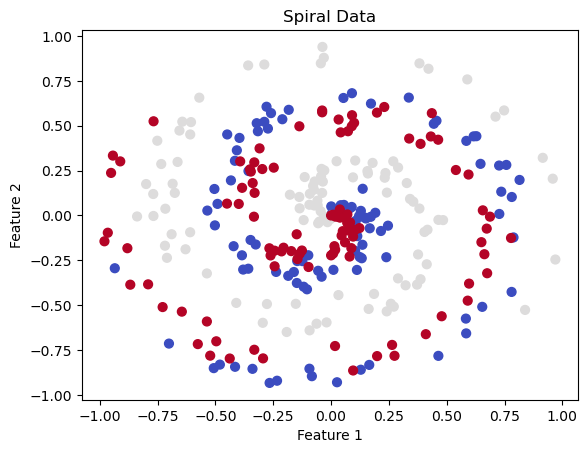

In [22]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

# Initialize nnfs (for consistent random numbers)
nnfs.init()

# Generate the spiral dataset
X, y = spiral_data(samples=100, classes=3)

# Print the first few data points
print("First 5 data points (X):")
print(X[:5])

print("First 5 labels (y):")
print(y[:5])

# Visualize the spiral dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=40)
plt.title("Spiral Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


### Training on 20,000 Epochs

Epoch 0, Loss: 1.096954345703125
Epoch 100, Loss: 1.0739296674728394
Epoch 200, Loss: 1.0702565908432007
Epoch 300, Loss: 1.0655733346939087
Epoch 400, Loss: 1.058944582939148
Epoch 500, Loss: 1.0492408275604248
Epoch 600, Loss: 1.0367032289505005
Epoch 700, Loss: 1.0380926132202148
Epoch 800, Loss: 1.031345009803772
Epoch 900, Loss: 1.040319561958313
Epoch 1000, Loss: 1.0088791847229004
Epoch 1100, Loss: 1.0187023878097534
Epoch 1200, Loss: 0.9763025045394897
Epoch 1300, Loss: 0.988186776638031
Epoch 1400, Loss: 0.96282958984375
Epoch 1500, Loss: 0.9640584588050842
Epoch 1600, Loss: 0.9452048540115356
Epoch 1700, Loss: 0.9493900537490845
Epoch 1800, Loss: 0.960199773311615
Epoch 1900, Loss: 0.9242765307426453
Epoch 2000, Loss: 0.9317671656608582
Epoch 2100, Loss: 0.897464394569397
Epoch 2200, Loss: 0.9404573440551758
Epoch 2300, Loss: 0.9162429571151733
Epoch 2400, Loss: 0.8875827193260193
Epoch 2500, Loss: 0.8735416531562805
Epoch 2600, Loss: 0.8868486285209656
Epoch 2700, Loss: 0.87

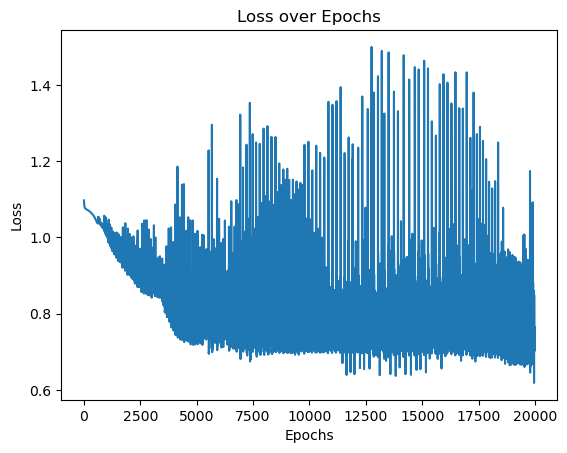

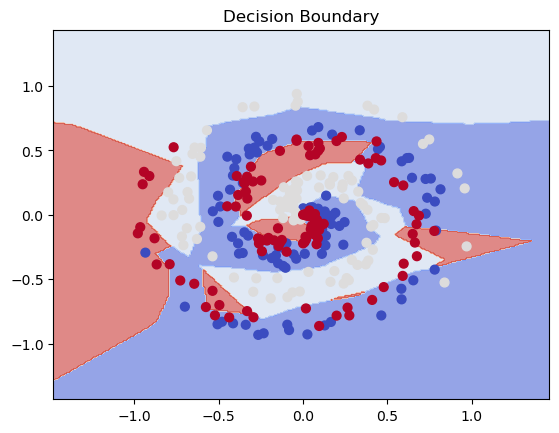

In [6]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

# Initialize nnfs (for consistent random numbers)
nnfs.init()

# Use your Layer_Dense, Activation_ReLu, Activation_Softmax, Loss_CategoricalCrossentropy, and Optimizer_SGD classes

# Define the neural network structure and functions here

# Generate dataset
X, y = spiral_data(samples=100, classes=3)

# Define the model structure
dense1 = Layer_Dense(2, 64)  # First layer with 2 inputs (features) and 64 neurons
activation1 = Activation_ReLu()

dense2 = Layer_Dense(64, 3)  # Second layer with 64 inputs and 3 outputs (for 3 classes)
activation2 = Activation_Softmax()

loss_function = Loss_CategoricalCrossentropy()
optimizer = Optimizer_SGD(learning_rate=1.0)

# Training loop
epochs = 20000
losses = []

for epoch in range(epochs):
    # Forward pass through first layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    
    # Forward pass through second layer
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    # Calculate loss
    loss = loss_function.forward(activation2.output, y)
    losses.append(loss)

    # Print the loss at intervals
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')
    
    # Backward pass through loss and second layer
    loss_function.backward(activation2.output, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    
    # Backward pass through first layer
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)
    
    # Update weights and biases
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)

# Visualize the training process

# Plot loss over epochs
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Plot the decision boundary

# Create a grid of points to evaluate the model
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
grid = np.c_[xx.ravel(), yy.ravel()]

# Forward pass through the trained network for the grid
dense1.forward(grid)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

# Get predicted class labels for each point in the grid
predictions = np.argmax(activation2.output, axis=1)
predictions = predictions.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, predictions, cmap='coolwarm', alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='coolwarm')
plt.title('Decision Boundary')
plt.show()


### Visualize the learned decision boundary

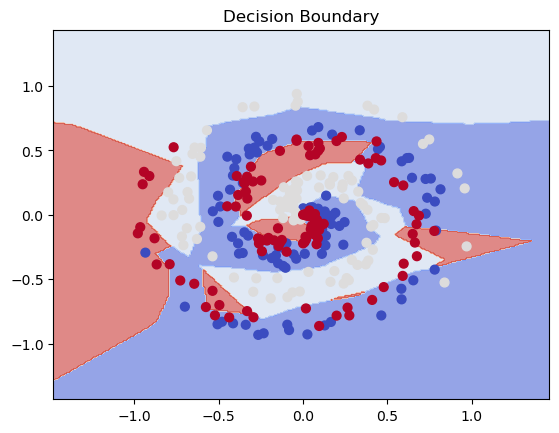

In [23]:
# Get predicted class labels for each point in the grid
predictions = np.argmax(activation2.output, axis=1)
predictions = predictions.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, predictions, cmap='coolwarm', alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='coolwarm')
plt.title('Decision Boundary')
plt.show()

In [8]:
print(len(losses))

20000


### Analyzing Cross Entropy Loss Progression

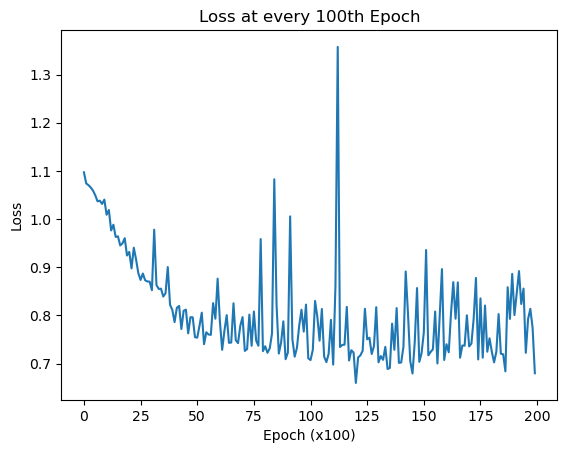

In [9]:
import matplotlib.pyplot as plt

# Assuming you have a list called 'losses' which is 20000 elements long

# Select every 100th loss from the list
selected_losses = [losses[i] for i in range(0, len(losses), 100)]

# Plot the selected losses
plt.plot(selected_losses)
plt.title("Loss at every 100th Epoch")
plt.xlabel("Epoch (x100)")
plt.ylabel("Loss")
plt.show()


In [11]:
print(selected_losses)

[1.0969543, 1.0739297, 1.0702566, 1.0655733, 1.0589446, 1.0492408, 1.0367032, 1.0380926, 1.031345, 1.0403196, 1.0088792, 1.0187024, 0.9763025, 0.9881868, 0.9628296, 0.96405846, 0.94520485, 0.94939005, 0.9601998, 0.92427653, 0.93176717, 0.8974644, 0.94045734, 0.91624296, 0.8875827, 0.87354165, 0.8868486, 0.8728531, 0.870338, 0.8700242, 0.8522461, 0.97786236, 0.8629853, 0.8549294, 0.85537606, 0.8390831, 0.84591687, 0.90029055, 0.82185346, 0.811351, 0.7859913, 0.8156976, 0.81954956, 0.7716971, 0.8095543, 0.8118378, 0.7626025, 0.7961309, 0.795974, 0.7546444, 0.75371, 0.7784862, 0.80553323, 0.7401516, 0.7648903, 0.7602279, 0.75962096, 0.82544416, 0.79308754, 0.8762531, 0.78764766, 0.7284626, 0.76793617, 0.8004639, 0.74301964, 0.7435531, 0.82505953, 0.7485486, 0.7423566, 0.77834654, 0.79641205, 0.72615623, 0.7300141, 0.80161744, 0.7368026, 0.8079966, 0.74752134, 0.736912, 0.95836306, 0.7256503, 0.73582, 0.7222773, 0.73163724, 0.7624652, 1.0825299, 0.8221355, 0.72071785, 0.7434325, 0.78765756

In [ ]:
# manual code to see the median

In [12]:
import numpy as np

# Calculate the mean and median of the selected losses
mean_loss = np.mean(selected_losses)
median_loss = np.median(selected_losses)

# Find the point where the network stops improving significantly
# This checks where the difference between consecutive losses is smaller than a threshold (e.g., 0.001)
differences = np.diff(selected_losses)  # Get differences between consecutive losses
threshold = 0.001  # Define a threshold for improvement
stopping_epoch = next((i for i, diff in enumerate(differences) if abs(diff) < threshold), None)

# Output the mean, median, and stopping epoch
print(f"Mean of selected losses: {mean_loss}")
print(f"Median of selected losses: {median_loss}")
print(f"Epoch where the network seems to stop improving: {stopping_epoch * 100 if stopping_epoch is not None else 'Not found'}")


Mean of selected losses: 0.8071436882019043
Median of selected losses: 0.7868194580078125
Epoch where the network seems to stop improving: 2800


In [25]:
print(len(selected_losses))
print(f"selected_losses at {stopping_epoch * 100} epoch is {selected_losses[stopping_epoch]}")

200
selected_losses at 2800 epoch is 0.8703380227088928


In [27]:
min_loss = min(selected_losses)
min_loss_epoch = selected_losses.index(min_loss) * 100
print(f"absolutely lowest min_loss_epoch occurs at {min_loss_epoch} epoch and is {min_loss}")

absolutely lowest min_loss_epoch occurs at 12000 epoch and is 0.6597513556480408


### Next
- tune learning rate
- try with different data
- do write up and write out all math
